# Solve Any Data Analysis Problem

## Chapter 7 - Project 5 - Example solution Part 2

Original survey data from https://insights.stackoverflow.com/survey

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

Read in previously exported data

In [2]:
survey = pd.read_parquet("./data/survey.parquet.gz")
survey_ai_users = pd.read_parquet("./data/survey_ai_users.parquet.gz")

We pick up from the previous chapter to explore the relationship between someone's years of experience and their attitude towards AI.

In [3]:
survey_ai_users["YearsCodePro"].unique()

array(['9', '4', '21', '3', '15', None, 'Less than 1 year', '10', '2',
       '6', '14', '7', '5', '16', '20', '11', '12', '19', '8', '50', '27',
       '13', '1', '18', '44', '22', '25', '24', '17', '26', '37', '30',
       'More than 50 years', '23', '32', '39', '28', '35', '36', '33',
       '34', '41', '31', '40', '38', '29', '43', '42', '45', '48', '47',
       '49', '46'], dtype=object)

This isn't numeric, but this is one categorical column we can actually make numeric

In [4]:
survey_ai_users["YearsCodePro"] = (
    survey_ai_users["YearsCodePro"]
    .replace({
        'Less than 1 year': 0,
        'More than 50 years': 50
    })
    .astype(float) # to account for NULLs
)

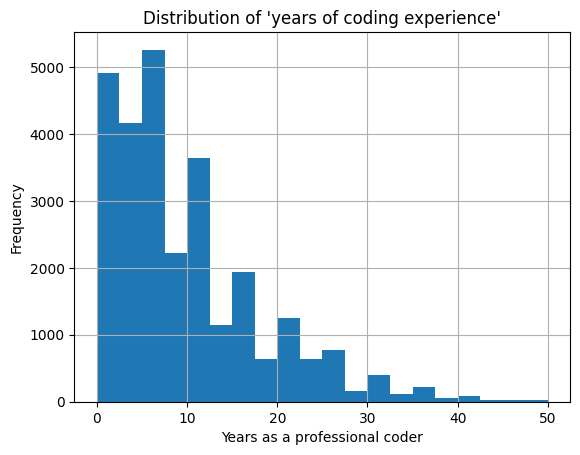

In [5]:
fig, axis = plt.subplots()

survey_ai_users["YearsCodePro"].hist(bins=20, ax=axis)

axis.set(
    title="Distribution of 'years of coding experience'",
    xlabel="Years as a professional coder",
    ylabel="Frequency"
)

plt.show()

Most people have been coding for less than 10 years, but with a long tail out to 50 years experience.

To test the relationship between experience and attitudes towards AI we can't just use correlation, since one of our variables is not continuous. One option is to look at the distribution of age by different attitudes to see what age groups each attitude is representative of:

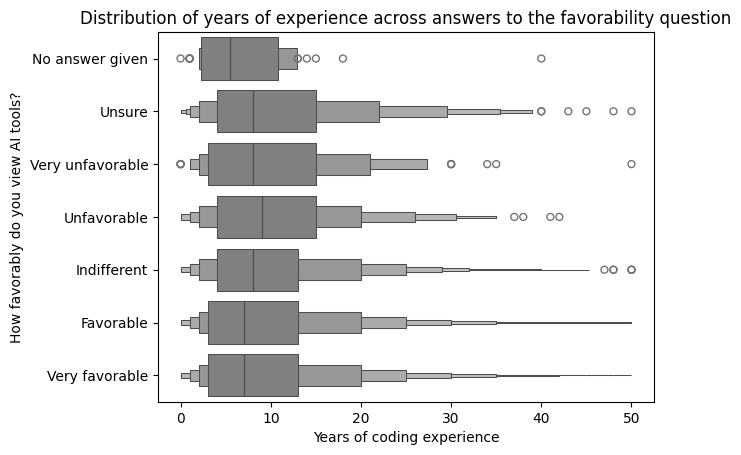

In [6]:
fig, axis = plt.subplots()

sns.boxenplot(
    data=survey_ai_users,
    x="YearsCodePro", y="AISent",
    color="gray",
    ax=axis
)

axis.set(
    title="Distribution of years of experience across answers to the favorability question",
    xlabel="Years of coding experience",
    ylabel="How favorably do you view AI tools?"
)

plt.show()

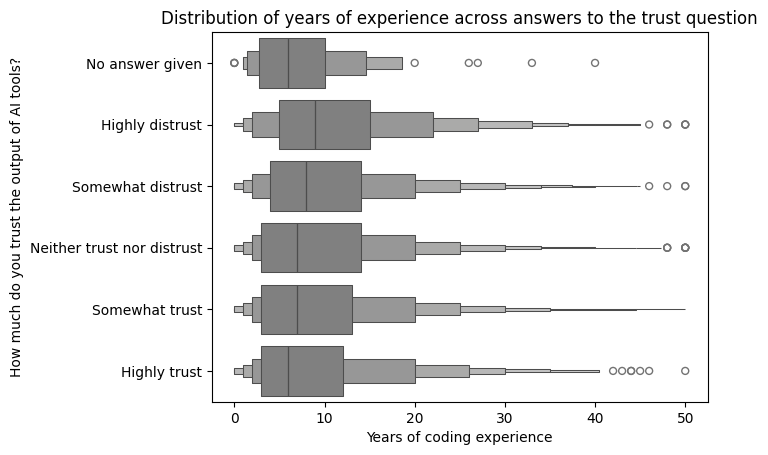

In [7]:
fig, axis = plt.subplots()

sns.boxenplot(
    data=survey_ai_users,
    x="YearsCodePro", y="AIBen",
    color="gray",
    ax=axis
)

axis.set(
    title="Distribution of years of experience across answers to the trust question",
    xlabel="Years of coding experience",
    ylabel="How much do you trust the output of AI tools?"
)

plt.show()

Quite a lot of noise, but the median years of experience of those distrustful of AI is higher.

What about viewed the other way, that is: what is the distribution of favorability/trust scores across experience groups?

We can bin our continuous experience column:

<Axes: >

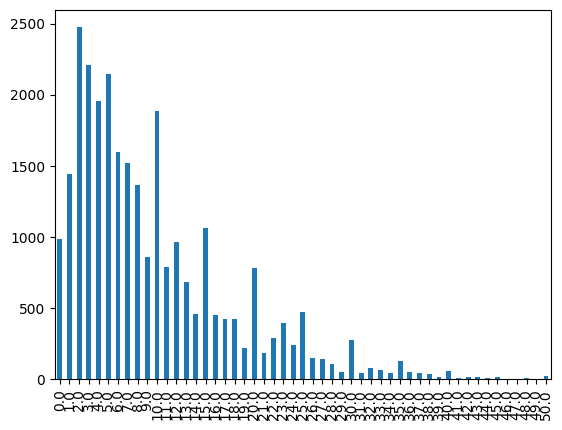

In [8]:
survey_ai_users["YearsCodePro"].value_counts().sort_index().plot.bar()

In [9]:
exp_bins = pd.cut(survey_ai_users["YearsCodePro"],
                  bins=[-1, 0, 2, 5, 10, 20, 50],
                  labels=["0", "1-2 years", "3-5 years",
                          "6-10 years", "11-20 years",
                          "over 20 years"]
                 )

# verify the groups
survey_ai_users.groupby(exp_bins)["YearsCodePro"].agg(["min", "max"])

,min,max
YearsCodePro,,
0,0.0,0.0
1-2 years,1.0,2.0
3-5 years,3.0,5.0
6-10 years,6.0,10.0
11-20 years,11.0,20.0
over 20 years,21.0,50.0


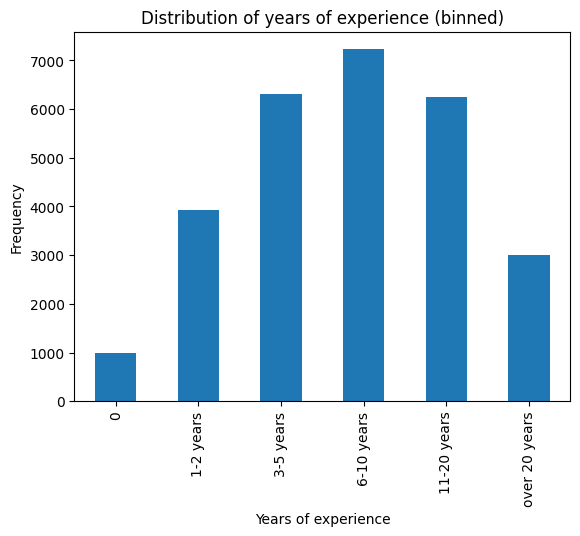

In [10]:
fig, axis = plt.subplots()

(
    exp_bins
    .value_counts()
    .sort_index()
    .plot
    .bar(ax=axis)
)

axis.set(
    title="Distribution of years of experience (binned)",
    xlabel="Years of experience",
    ylabel="Frequency"
)

plt.show()

In [11]:
exp_vs_sent = pd.crosstab(
    index=exp_bins,
    columns=survey_ai_users["AISent"],
    normalize="index"
)

exp_vs_sent.round(3)

AISent,No answer given,Unsure,Very unfavorable,Unfavorable,Indifferent,Favorable,Very favorable
YearsCodePro,,,,,,,
0,0.001,0.015,0.004,0.018,0.104,0.506,0.352
1-2 years,0.003,0.017,0.004,0.015,0.101,0.510,0.350
3-5 years,0.002,0.015,0.002,0.016,0.105,0.489,0.372
6-10 years,0.001,0.017,0.004,0.019,0.113,0.476,0.370
11-20 years,0.002,0.017,0.003,0.023,0.112,0.484,0.358
over 20 years,0.000,0.022,0.004,0.021,0.108,0.475,0.370


Redefine the `create_heatmap` function (it could also be in a shared file/module)

In [12]:
def create_heatmap(data, square=True):
    fig, axis = plt.subplots()

    sns.heatmap(
        data=data,
        cmap="Greys",
        vmin=0,
        vmax=1,
        square=square,
        annot=True,
        ax=axis
    )

    return fig, axis

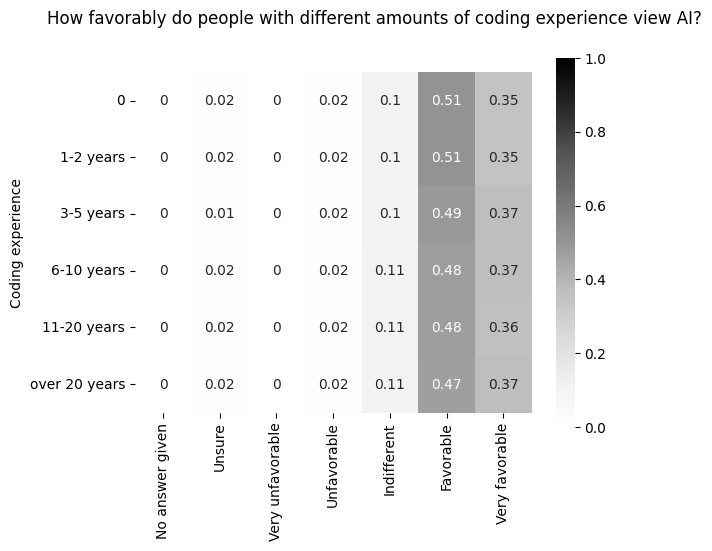

In [13]:
fig, axis = create_heatmap(
    exp_vs_sent.round(2)
)

fig.suptitle("How favorably do people with different amounts of coding experience view AI?")

axis.set(
    xlabel=None,
    ylabel="Coding experience"
)

plt.show()

Not a huge difference, but what about trust?

In [14]:
exp_vs_trust = pd.crosstab(
    index=exp_bins,
    columns=survey_ai_users["AIBen"],
    normalize="index"
)

exp_vs_trust

AIBen,No answer given,Highly distrust,Somewhat distrust,Neither trust nor distrust,Somewhat trust,Highly trust
YearsCodePro,,,,,,
0,0.003033,0.040445,0.172902,0.266936,0.479272,0.037412
1-2 years,0.004083,0.039806,0.173258,0.282470,0.466956,0.033427
3-5 years,0.002856,0.044423,0.181501,0.278597,0.456132,0.036491
6-10 years,0.002905,0.058522,0.197842,0.288877,0.422939,0.028915
11-20 years,0.002238,0.064109,0.203197,0.296243,0.407834,0.026379
over 20 years,0.001328,0.076054,0.205912,0.279309,0.406177,0.031219


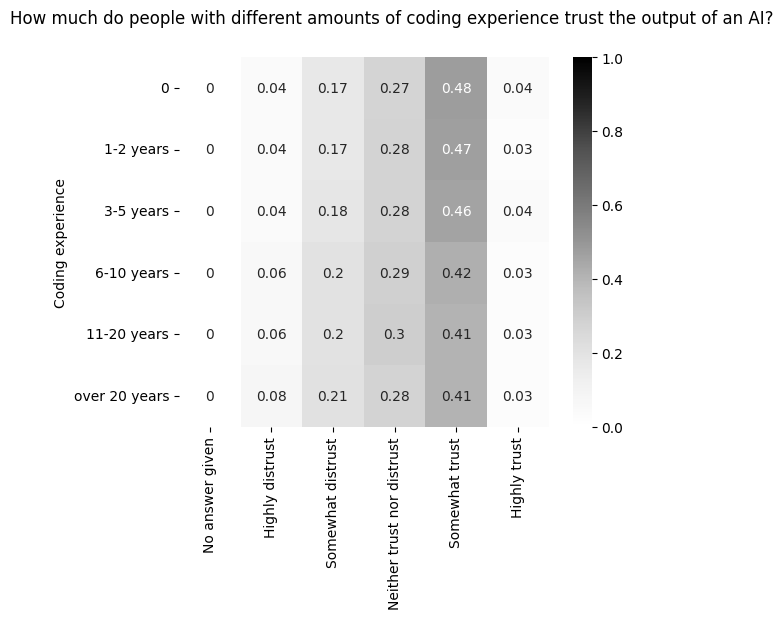

In [15]:
fig, axis = create_heatmap(
    exp_vs_trust.round(2)
)

fig.suptitle("How much do people with different amounts of coding experience trust the output of an AI?")

axis.set(
    xlabel=None,
    ylabel="Coding experience"
)

plt.show()

There's definitely something about people with >5 years experience being less trusting in AI output.

How does this relationship translate to statistics? If these were continuous measures we could calculate the correlation, but we can't do that if the variables are categorical.

Let's calculate Spearman's rank correlation and Kendall's tau. These are both rank-based, so first we need to rank the trust variable, which we can only do if it's numeric. We can only add numeric values to the answers that aren't "No answer given", otherwise the data isn't really ordinal.

In [16]:
trust_exp_data = (
    survey_ai_users
    .dropna(subset=["YearsCodePro", "AIBen"], how="any")
    .loc[survey_ai_users["AIBen"] != "No answer given", :]
)

trust_rank = (
    pd.Series(
        trust_exp_data["AIBen"]
        .factorize(sort=True)[0]
    )
    .rank()
)

trust_rank

0         4187.0
1        20758.5
2        20758.5
3         4187.0
4         4187.0
          ...   
27624      765.0
27625    10799.0
27626    20758.5
27627    20758.5
27628    10799.0
Length: 27629, dtype: float64

In [17]:
from scipy.stats import spearmanr, kendalltau

correlation, p_value = spearmanr(
    trust_exp_data["YearsCodePro"],
    trust_rank
)

print("Spearman's\n", correlation, p_value)

correlation, p_value = kendalltau(
    trust_exp_data["YearsCodePro"],
    trust_rank
)

print("Kendall's tau\n", correlation, p_value)

Spearman's
 -0.0650445414009189 2.6886332522054827e-27
Kendall's tau
 -0.05052236119624125 2.5557806077186822e-27


That looks like both tests agree that we have statistically significant non-correlation. That means although there's a difference in the median years of experience of each trust category, there isn't a statistically significant relationship between them.

Finally, what about what people who use AI are **not** interested in using AI for?

In [18]:
ai_not_interested_indicators = (
    survey.loc[survey["AISelect"] == "Yes", "AIToolNot interested in Using"]
    .str.get_dummies(sep=";")
)
ai_not_interested_indicators

,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
5,1,1,0,1,1,1,0,1,1,1
6,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87965,0,0,0,0,0,0,0,0,0,0
87968,0,0,0,1,0,0,0,0,0,0
87969,1,1,0,1,0,0,0,1,0,0
87971,0,1,0,0,0,0,0,0,0,0


First, a summary:

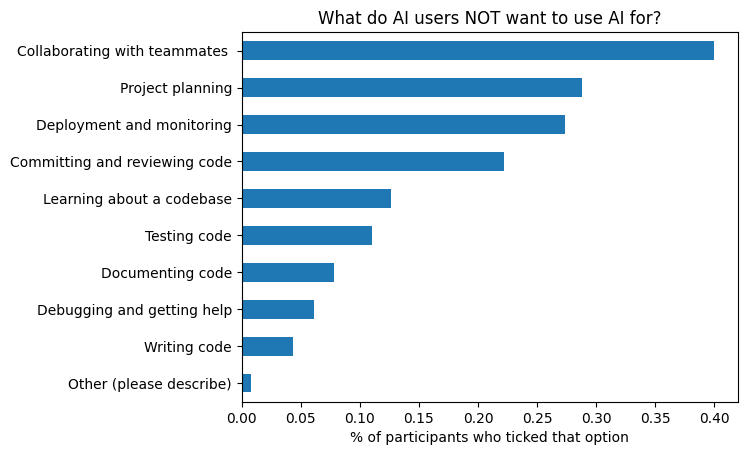

In [19]:
fig, axis = plt.subplots()

(
    ai_not_interested_indicators
    .mean()
    .sort_values()
    .plot
    .barh(ax=axis)
)

axis.set(
    title="What do AI users NOT want to use AI for?",
    xlabel="% of participants who ticked that option"
)

plt.show()

This by job role:

(first, add to original data to add "not interested" indicators):

In [20]:
# concat will by default match on indices
ai_users_not_int = (
    pd.concat([survey, ai_not_interested_indicators], axis=1)
    .dropna(subset=ai_not_interested_indicators.columns, how="any") # drop nulls
)

assert len(survey[survey["AISelect"] == "Yes"]) == len(ai_users_not_int)

ai_users_not_int.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
0,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,7,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Profe...,Some college/university study without earning ...,Friend or family member;Online Courses or Cert...,None,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
6,8,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Recreate developer role mappings (from previous chapter)

In [21]:
devtype_map = {}

devtypes = (
    survey_ai_users
    .dropna(subset=["DevType"])
    .query("DevType.str.startswith('Developer')")
    .loc[:,"DevType"]
)

dev_exclusions = ["Developer Experience", "Developer Advocate"]

dev_devtypes = [col for col in devtypes.value_counts().index if col not in dev_exclusions]

for col in dev_devtypes:
    devtype_map[col] = "Developer"

In [22]:
ai_users_not_int["job_category"] = ai_users_not_int["DevType"].replace(devtype_map)

not_interested_job_dfs = []

for col in ai_not_interested_indicators.columns:
    option_df = (
        ai_users_not_int[ai_users_not_int[col] == 1]
        .dropna(subset="job_category")
        .groupby("job_category")
        .size()
        .reset_index(name="count")
        .assign(option=col)
    )
    not_interested_job_dfs.append(option_df)

not_interested_options_vs_jobs = pd.concat(not_interested_job_dfs, axis=0, ignore_index=True)

print(not_interested_options_vs_jobs.shape)
not_interested_options_vs_jobs.head()

(253, 3)


,job_category,count,option
0,Academic researcher,231,Collaborating with teammates
1,Blockchain,78,Collaborating with teammates
2,Cloud infrastructure engineer,197,Collaborating with teammates
3,Data or business analyst,118,Collaborating with teammates
4,Data scientist or machine learning specialist,357,Collaborating with teammates


In [23]:
job_not_int_crosstab = (
    pd.crosstab(index=not_interested_options_vs_jobs["option"],
                columns=not_interested_options_vs_jobs["job_category"],
                values=not_interested_options_vs_jobs["count"],
                aggfunc="sum",
                normalize="columns")
    .transpose()
)

job_not_int_crosstab

option,Collaborating with teammates,Committing and reviewing code,Debugging and getting help,Deployment and monitoring,Documenting code,Learning about a codebase,Other (please describe),Project planning,Testing code,Writing code
job_category,,,,,,,,,,
Academic researcher,0.239378,0.135751,0.044560,0.173057,0.041451,0.087047,0.004145,0.184456,0.064249,0.025907
Blockchain,0.267123,0.133562,0.034247,0.184932,0.044521,0.047945,0.003425,0.181507,0.065068,0.037671
Cloud infrastructure engineer,0.245636,0.133416,0.046135,0.158354,0.039900,0.083541,0.007481,0.206983,0.054863,0.023691
Data or business analyst,0.245322,0.164241,0.033264,0.185031,0.054054,0.056133,0.006237,0.149688,0.087318,0.018711
Data scientist or machine learning specialist,0.245868,0.133609,0.034435,0.171488,0.035813,0.082645,0.007576,0.192149,0.069559,0.026860
Database administrator,0.224138,0.146552,0.060345,0.155172,0.112069,0.060345,0.000000,0.163793,0.068966,0.008621
Designer,0.250000,0.125000,0.014706,0.191176,0.058824,0.073529,0.000000,0.183824,0.073529,0.029412
DevOps specialist,0.263374,0.136831,0.034979,0.148148,0.041152,0.082305,0.000000,0.215021,0.059671,0.018519
Developer,0.251489,0.137906,0.038502,0.166983,0.048034,0.080421,0.004486,0.186394,0.059595,0.026193


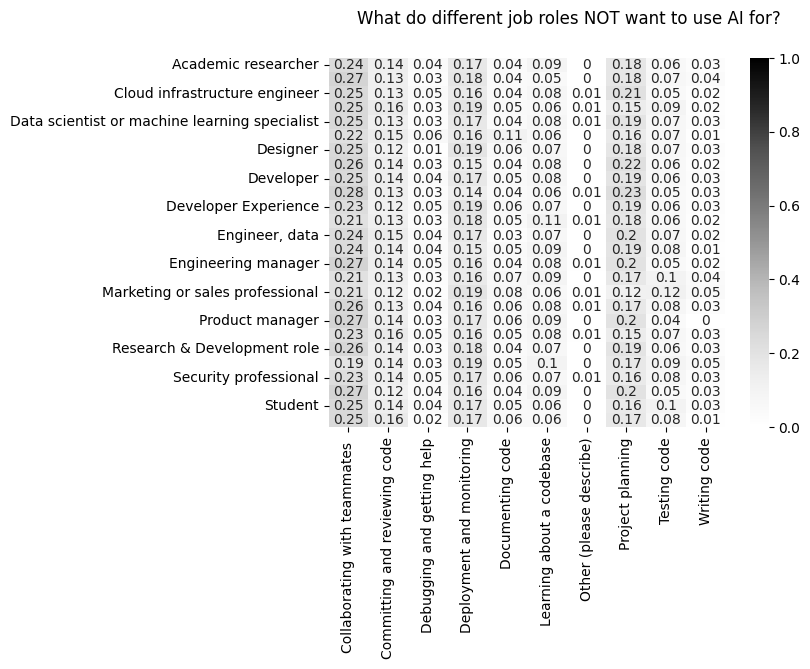

In [24]:
fig, axis = create_heatmap(
    job_not_int_crosstab.round(2),
    square=False
)

fig.suptitle("What do different job roles NOT want to use AI for?")

axis.set(xlabel=None, ylabel=None)

plt.show()

Most people don't want to use AI for collaboration, deployment/monitoring, committing code, or project planning. Unsurprisingly, jobs like marketing that don't require coding won't use it for testing code.

Other avenues:

- did people who answered "I can't find/share info in my business" say they'd use AI for these?
- did people who said they need more help from their team say they'd use AI for this?
- what about "how long do you search for information" vs. AI usage?